**LGMVIP- Data Science Internship -july2023** <br>

**Task 5 - Exploratory Data Analysis - Terrorism <br>**

**As a security/defense analyst, try to find out the hot zone of terrorism.**<br>**Reading and Analyzing the Dataset:**

**Author Name - Roshan Raj <br>**
**Reading and Analyzing the Dataset:**

**importing all the libraries reqiured for analysis**




In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**importing and observing the data**


In [2]:
data = pd.read_csv("/content/globalterrorism.csv",encoding="latin1")
df = pd.DataFrame(data)
print("successfully imported")

successfully imported


<ipython-input-2-82ebb4315b81>:1: DtypeWarning: Columns (4,31,33,76,94,96) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/globalterrorism.csv",encoding="latin1")


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Columns: 135 entries, eventid to related
dtypes: float64(64), int64(17), object(54)
memory usage: 5.2+ MB


In [5]:
df.shape

(5096, 135)

In [6]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Columns: 135 entries, eventid to related
dtypes: float64(64), int64(17), object(54)
memory usage: 5.2+ MB


**cleaning the data**


In [8]:
df=df[['iyear','imonth', 'iday', 'country_txt','region_txt','provstate','city',
       'latitude','longitude','location','summary','attacktype1_txt','targtype1_txt','gname','motive',
       'weaptype1_txt', 'nkill','nwound','addnotes']]

In [9]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [10]:
df.rename(columns={'iyear':'year','imonth':'month', 'iday':'day', 'country_txt':'country',
                   'region_txt':'region','provstate':'provstate',
                   'attacktype1_txt':'attack_type','targtype1_txt':'target_type','gname':'group_name',
                   'weaptype1_txt':'weapon_type', 'nkill':'killed','nwound':'wounded','addnotes':'add_notes'}, inplace= True)

In [83]:
df.head()

,year,month,day,country,region,provstate,city,latitude,longitude,location,summary,attack_type,target_type,group_name,motive,weapon_type,killed,wounded,add_notes,casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,NaN,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         5096 non-null   int64  
 1   month        5096 non-null   int64  
 2   day          5096 non-null   int64  
 3   country      5096 non-null   object 
 4   region       5096 non-null   object 
 5   provstate    5083 non-null   object 
 6   city         5096 non-null   object 
 7   latitude     5006 non-null   float64
 8   longitude    5006 non-null   float64
 9   location     515 non-null    object 
 10  summary      798 non-null    object 
 11  attack_type  5096 non-null   object 
 12  target_type  5095 non-null   object 
 13  group_name   5095 non-null   object 
 14  motive       536 non-null    object 
 15  weapon_type  5095 non-null   object 
 16  killed       4484 non-null   float64
 17  wounded      3308 non-null   float64
 18  add_notes    580 non-null    object 
dtypes: flo

In [13]:
df.isnull().sum()

year              0
month             0
day               0
country           0
region            0
provstate        13
city              0
latitude         90
longitude        90
location       4581
summary        4298
attack_type       0
target_type       1
group_name        1
motive         4560
weapon_type       1
killed          612
wounded        1788
add_notes      4516
dtype: int64

In [14]:
df['killed']=df['killed'].fillna(0)
df['wounded']= df['wounded'].fillna(0)
df['casualty']= df['killed'] +df['wounded']

In [15]:
df.describe()

,year,month,day,latitude,longitude,killed,wounded,casualty
count,5096.000000,5096.000000,5096.000000,5006.000000,5006.000000,5096.000000,5096.000000,5096.000000
mean,1973.809066,6.158359,15.303375,36.559454,-26.458558,0.647567,0.719192,1.366758
std,2.337862,3.293888,9.140459,22.836022,51.475161,3.033054,7.164589,8.232747
min,1970.000000,0.000000,0.000000,-43.532054,-157.818968,0.000000,0.000000,0.000000
25%,1972.000000,3.000000,7.000000,35.800916,-73.931351,0.000000,0.000000,0.000000
50%,1974.000000,6.000000,15.000000,41.400635,-5.956210,0.000000,0.000000,0.000000
75%,1976.000000,9.000000,23.000000,52.501530,7.519113,1.000000,0.000000,1.000000
max,1977.000000,12.000000,31.000000,59.332788,172.636225,92.000000,285.000000,295.000000


observation <br>
1.The data consists of terrorist activities rangning from the year 1970 to 1979 <br>
2. maximum number of people killd is 422 <br>
3. maximum number of people wounded is 285 <br>


**Correlation and Heatmap:**





In [ ]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,month,day,latitude,longitude,killed,wounded,casualty
year,1.000000,-0.051454,-0.015840,-0.128093,0.219302,0.015221,0.020810,0.024102
month,-0.051454,1.000000,0.001390,-0.011123,0.012336,0.013203,0.017126,0.020251
day,-0.015840,0.001390,1.000000,0.016124,0.014895,-0.000305,-0.001276,-0.001092
latitude,-0.128093,-0.011123,0.016124,1.000000,0.284790,-0.023490,-0.007169,-0.019448
longitude,0.219302,0.012336,0.014895,0.284790,1.000000,0.051926,0.073228,0.083843
killed,0.015221,0.013203,-0.000305,-0.023490,0.051926,1.000000,0.138099,0.711598
wounded,0.020810,0.017126,-0.001276,-0.007169,0.073228,0.138099,1.000000,0.794126
casualty,0.024102,0.020251,-0.001092,-0.019448,0.083843,0.711598,0.794126,1.000000


<ipython-input-18-f9427d5d4859>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


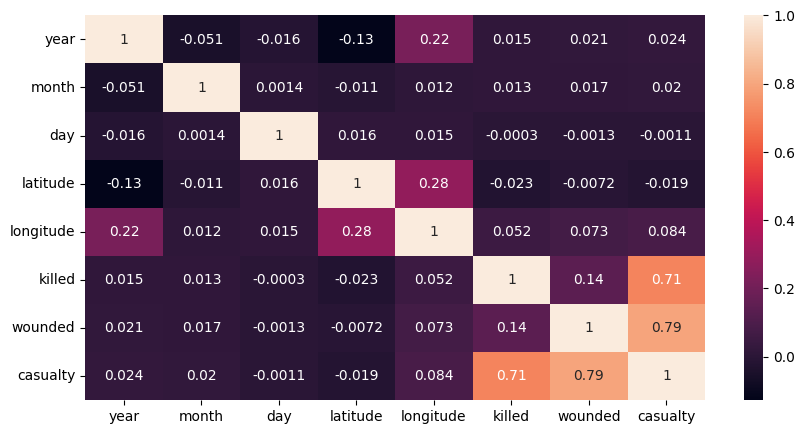

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

**Performing Some Data Visualizations:**








In [ ]:
#total attack in year
df['year'].value_counts(dropna = False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2404
Name: year, dtype: int64

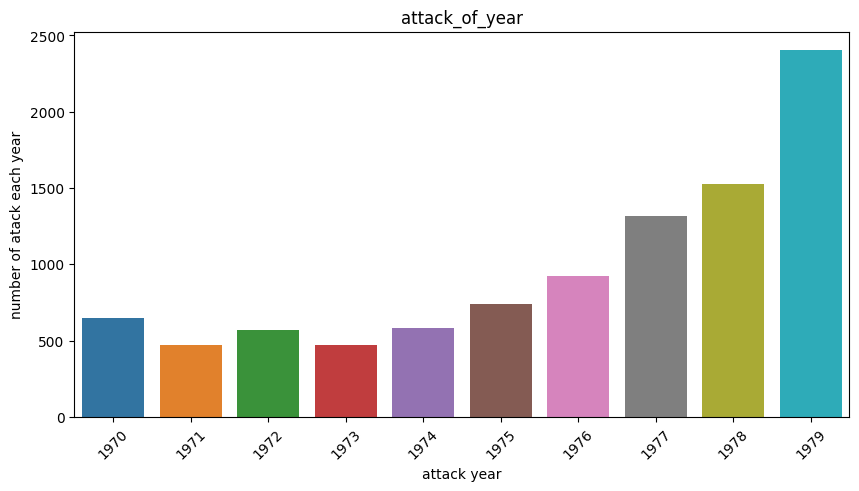

In [ ]:
x_year = df['year'].unique()
y_count_years = df['year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (10,5))
sns.barplot(x = x_year, y = y_count_years)
plt.xticks(rotation = 45)
plt.xlabel('attack year')
plt.ylabel('number of atack each year')
plt.title("attack_of_year")
plt.show()

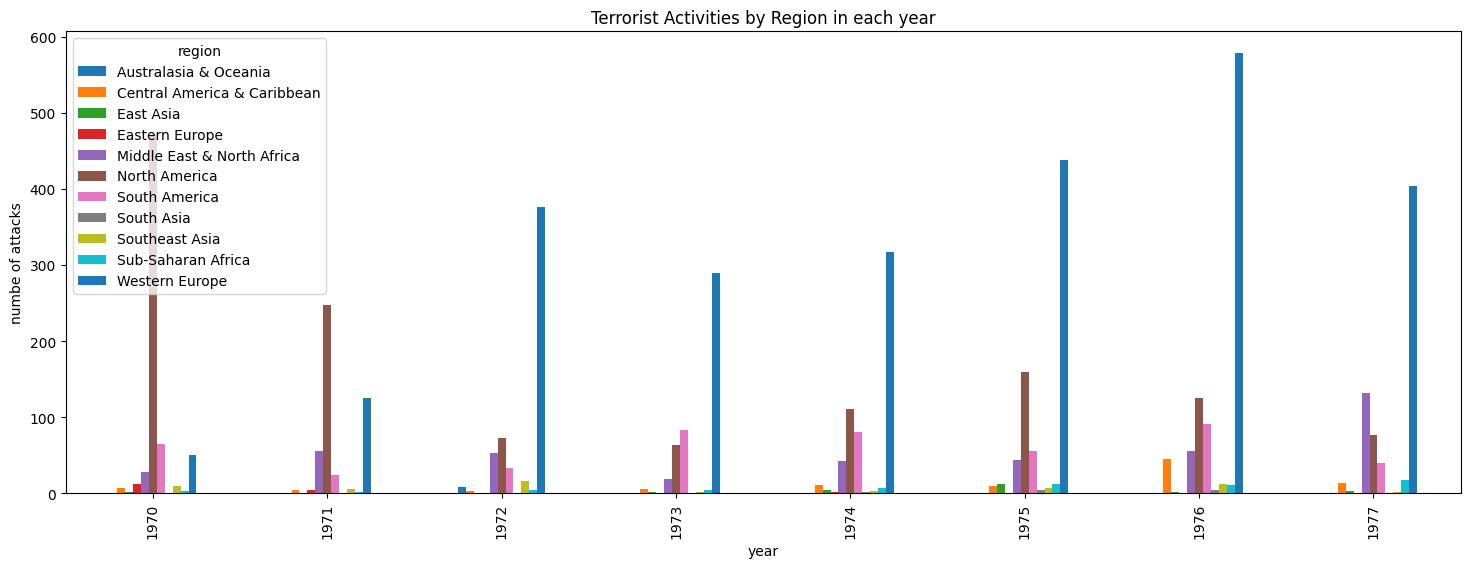

In [18]:

#terrorist activites in each region

pd.crosstab(df.year, df.region).plot(kind='bar', figsize=(18,6))
plt.title("Terrorist Activities by Region in each year")
plt.ylabel("numbe of attacks")
plt.show()

Text(0, 0.5, 'casualities')

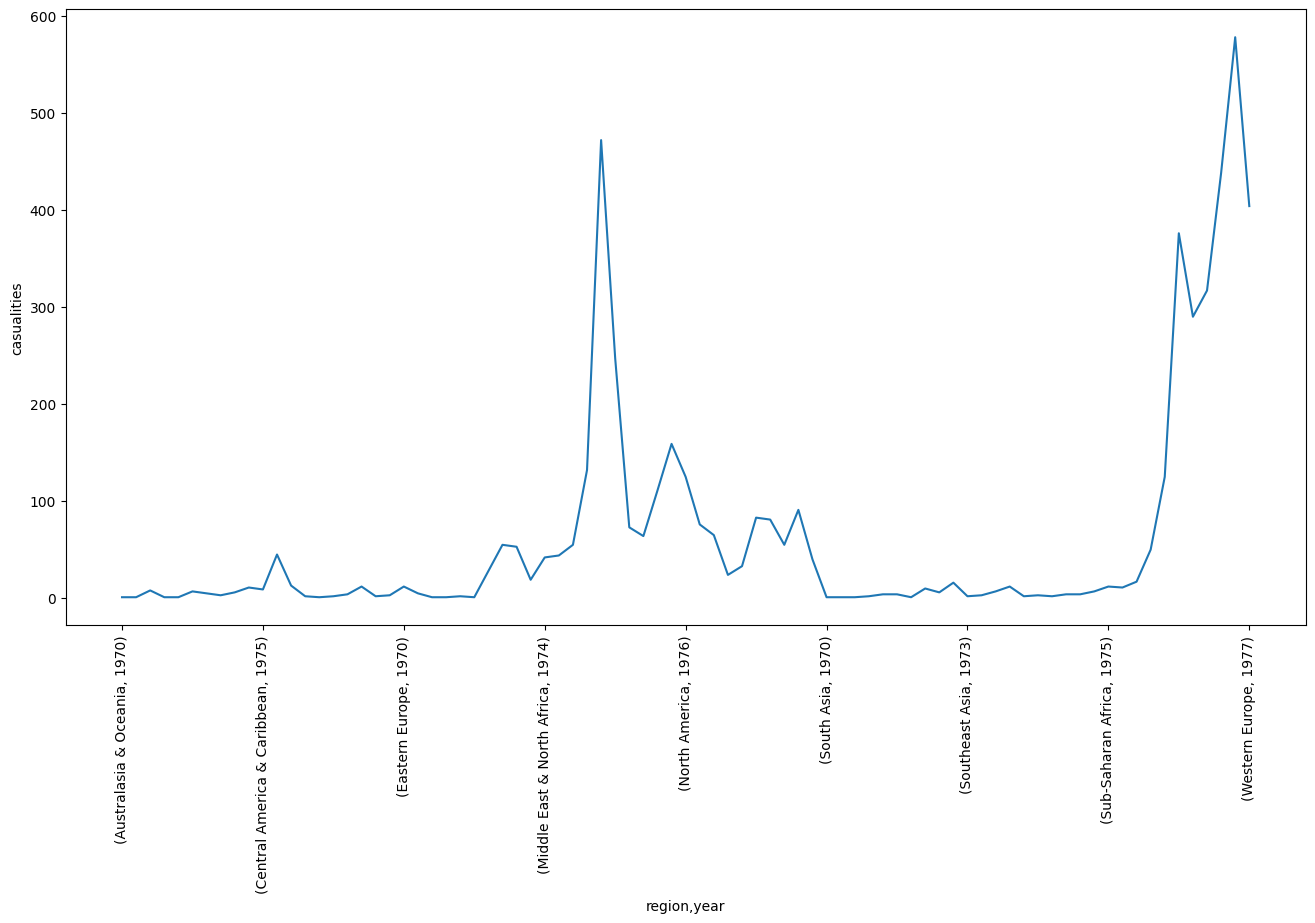

In [25]:
plt.subplots(figsize=(16,8))
df.groupby(['region', 'year']).count()['casualty'].plot()
plt.xticks(rotation=90)
plt.ylabel("casualities")

In [31]:
#killed in each year

yk = df[['year','killed']].groupby('year').sum()
yk.head()


,killed
year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [32]:
#  wounded in each region
yw = df[['year', 'wounded']].groupby('year').sum()
yw.head()


,wounded
year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


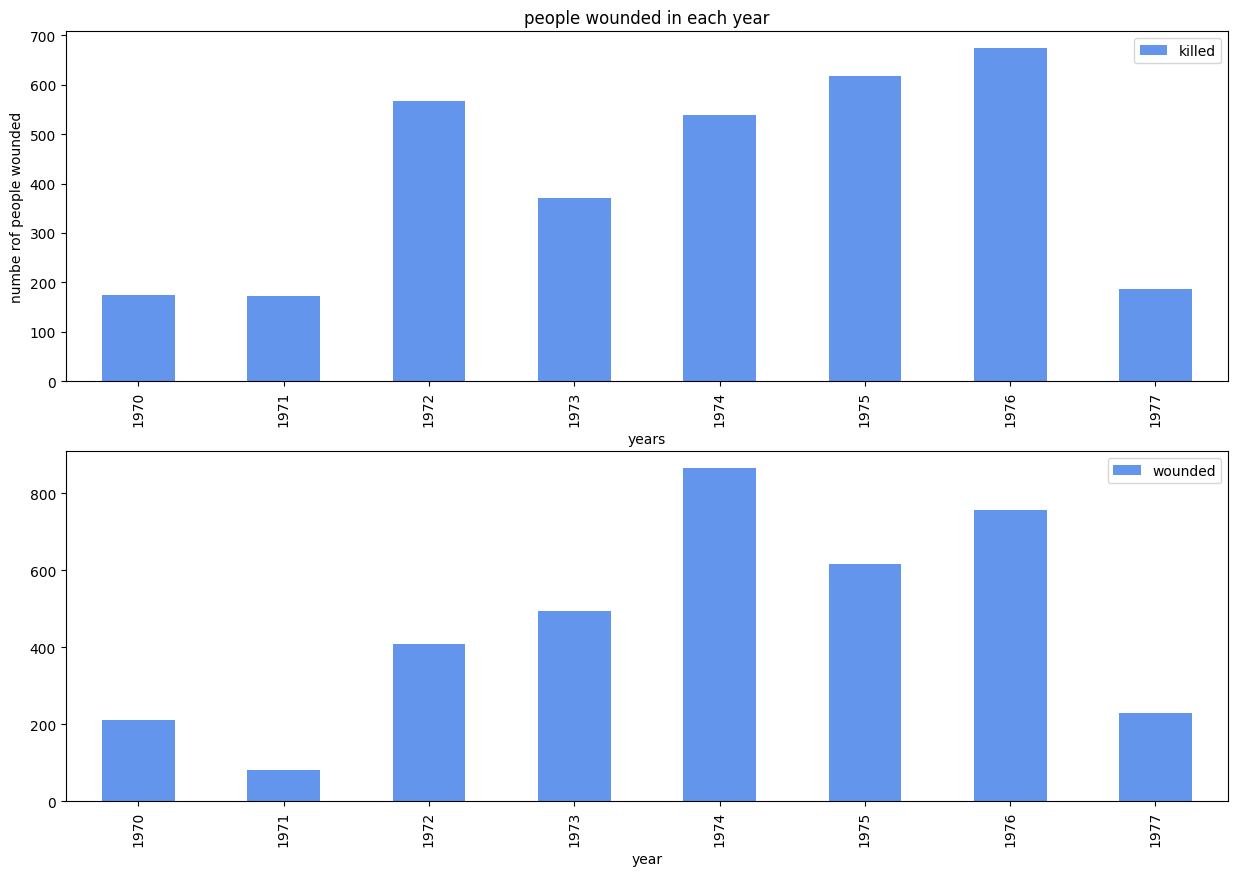

In [37]:
fig = plt.figure()
ax0 =fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,1,2)

#killed
yk.plot(kind='bar', color = 'cornflowerblue', figsize = (15,10), ax=ax0)
ax0.set_title('people killed in each year')
ax0.set_xlabel('years')
ax0.set_ylabel('numbe rof people killed')

#wounded
yw.plot(kind='bar', color = 'cornflowerblue', figsize = (15,10), ax=ax1)
ax0.set_title('people wounded in each year')
ax0.set_xlabel('years')
ax0.set_ylabel('numbe rof people wounded')
plt.show()


**region wise attack**

In [38]:
# distribution of terrorist attack over region

reg = pd.crosstab(df.year, df.region)
reg.head()

region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,8,3,0,1,53,73,33,1,16,4,376
1973,1,6,2,1,19,64,83,1,2,4,290
1974,1,11,4,2,42,111,81,2,3,7,317


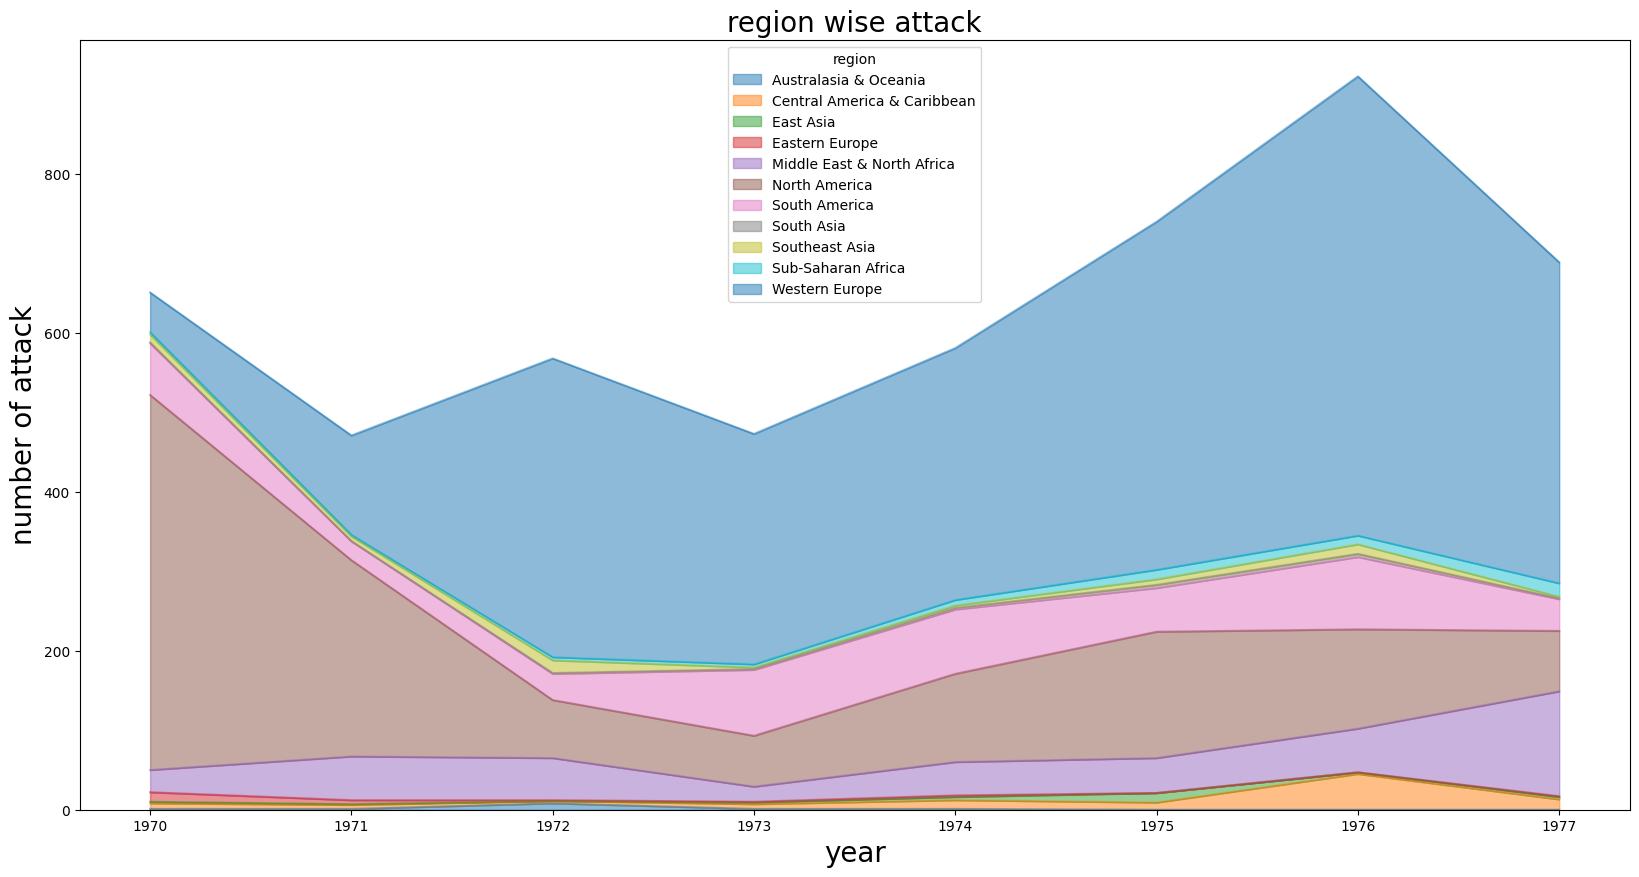

In [40]:
reg.plot(kind = 'area', stacked ='false', alpha = 0.5, figsize=(20,10))
plt.title('region wise attack', fontsize = 20)
plt.xlabel('year', fontsize=20)
plt.ylabel('number of attack', fontsize=20)
plt.show()

In [41]:
# total terrorist attack in each region

regt = reg.transpose()
regt['total']=regt.sum(axis=1)
ra = regt['total'].sort_values(ascending = False)
ra

region
Western Europe                 2578
North America                  1327
South America                   472
Middle East & North Africa      428
Central America & Caribbean      99
Sub-Saharan Africa               60
Southeast Asia                   58
East Asia                        26
Eastern Europe                   22
South Asia                       14
Australasia & Oceania            12
Name: total, dtype: int64

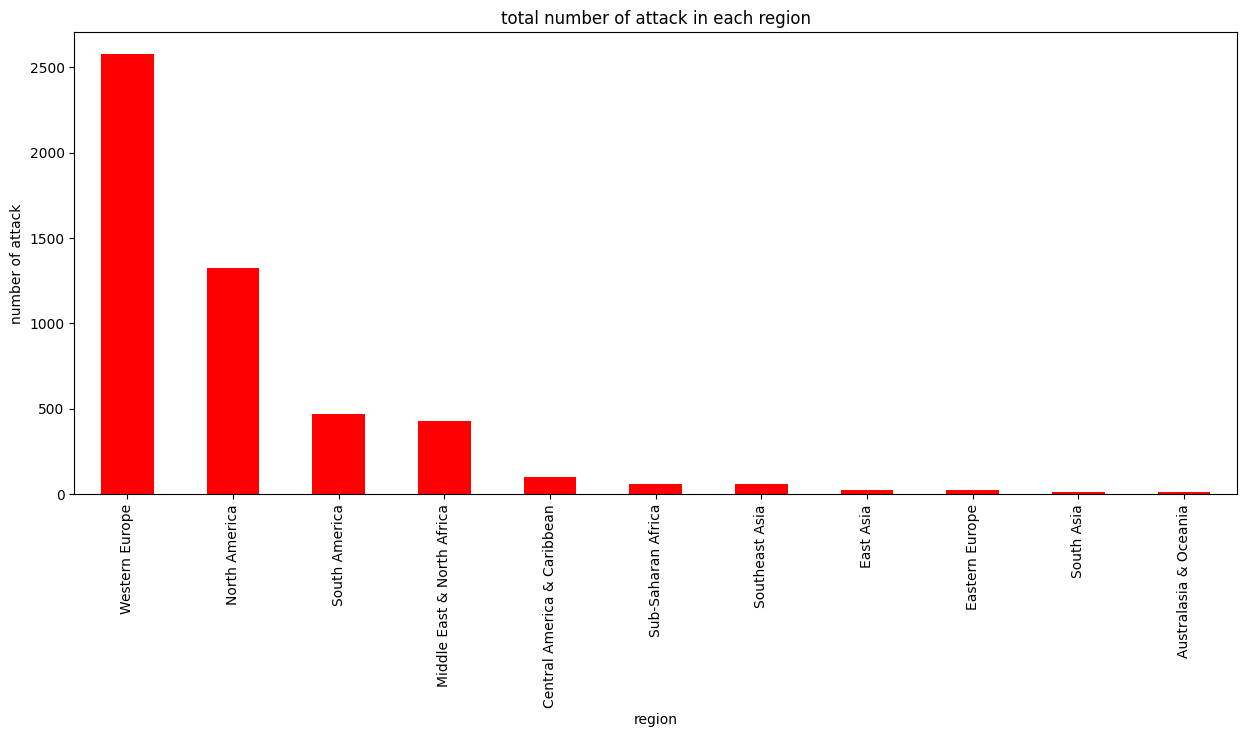

In [51]:
ra.plot(kind = 'bar', figsize = (15,6), color='red')
plt.title('total number of attack in each region')
plt.xlabel('region')
plt.ylabel('number of attack')
plt.show()

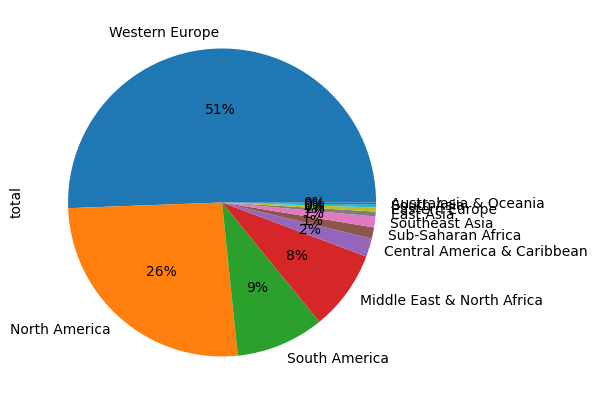

In [53]:
ra.plot(kind = 'pie',figsize=(10,5), autopct='%1.0f%%')

plt.show()

In [57]:
# killed in each region

rk = df[['region', 'killed']].groupby('region').sum().sort_values(by='killed', ascending =False)
rk

,killed
region,
Western Europe,2051.0
South America,327.0
Middle East & North Africa,258.0
North America,228.0
Southeast Asia,180.0
Central America & Caribbean,125.0
Sub-Saharan Africa,62.0
Eastern Europe,29.0
East Asia,28.0


In [58]:
# wounded in each region
rw = df[['region', 'wounded']].groupby('region').sum().sort_values(by='wounded', ascending =False)
rw

,wounded
region,
Western Europe,1694.0
Middle East & North Africa,872.0
North America,560.0
South America,187.0
Southeast Asia,173.0
Sub-Saharan Africa,106.0
South Asia,27.0
Central America & Caribbean,22.0
Eastern Europe,14.0


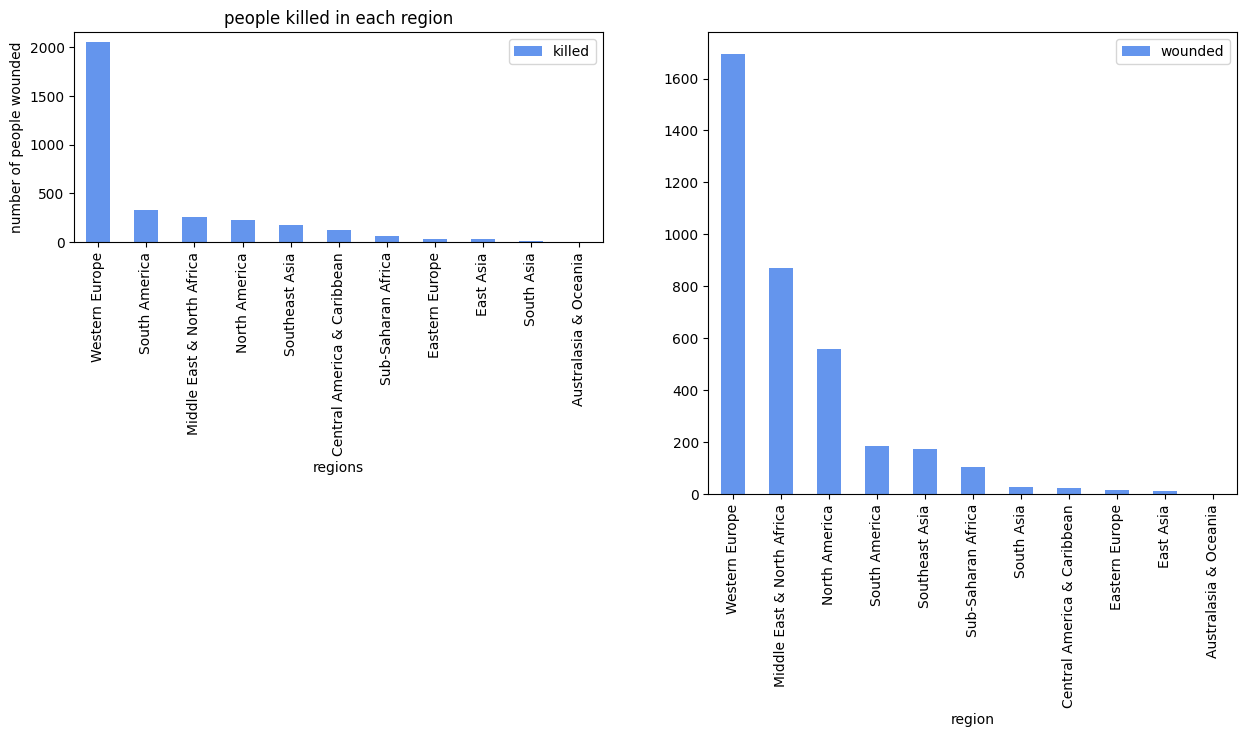

In [64]:
fig = plt.figure()
ax0 =fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(1,2,2)

#killed
rk.plot(kind='bar', color = 'cornflowerblue', figsize = (15,6), ax=ax0)
ax0.set_title('people killed in each region')
ax0.set_xlabel('regions')
ax0.set_ylabel('number of people killed')

#wounded
rw.plot(kind='bar', color = 'cornflowerblue', figsize = (15,6), ax=ax1)

ax0.set_xlabel('regions')
ax0.set_ylabel('number of people wounded')
plt.show()


**Country wise attack**

In [73]:
# number of attack in each coutry(10 top)
ct=df['country'].value_counts().head(10)
ct



United States         1259
United Kingdom        1245
Italy                  368
Spain                  345
Argentina              279
West Germany (FRG)     225
Turkey                 222
France                 178
Greece                  82
Iran                    67
Name: country, dtype: int64

In [76]:
#2. total casualities in each country
ctc = df[['country', 'casualty']].groupby('country').sum().sort_values(by = 'casualty', ascending = False)
ctc

,casualty
country,
United Kingdom,2517.0
United States,697.0
Israel,502.0
Argentina,432.0
Italy,374.0
...,...
Poland,0.0
Saudi Arabia,0.0
Singapore,0.0


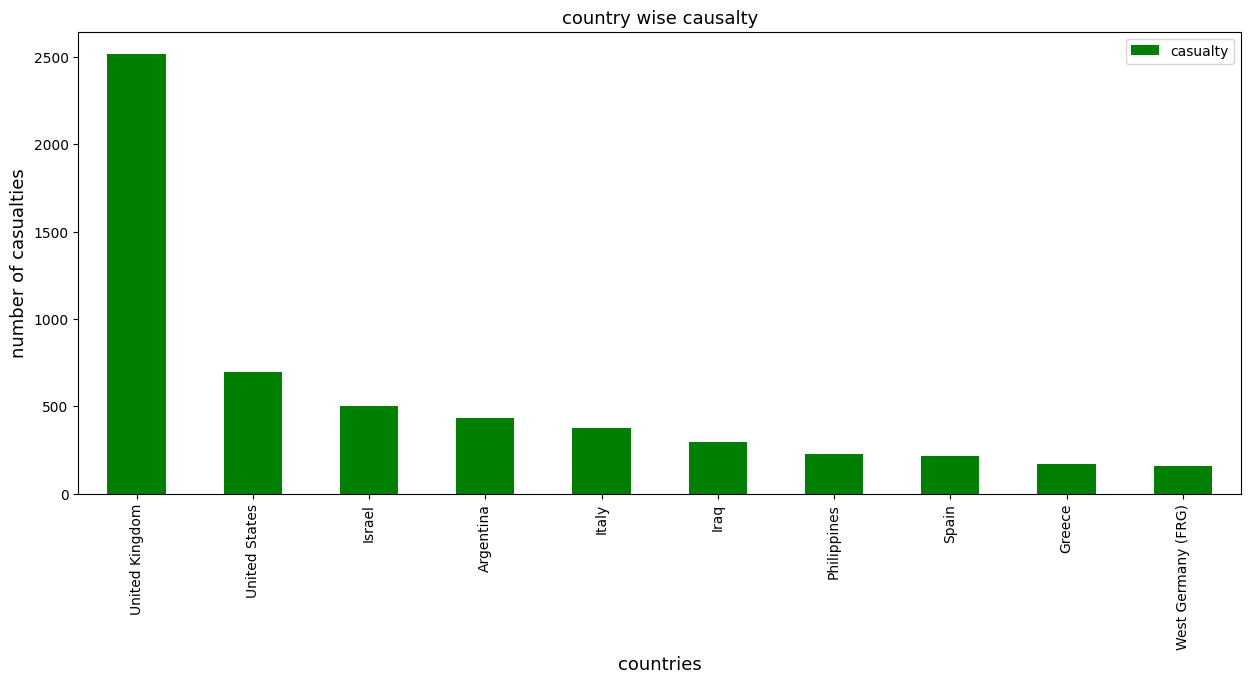

In [79]:
ctc[:10].plot(kind = 'bar', figsize = (15,6), color='green')
plt.title('country wise causalty', fontsize = 13)
plt.xlabel('countries', fontsize= 13)
plt.ylabel('number of casualties', fontsize =13)
plt.show()


In [80]:
#killed in each  country

cnk = df[['country', 'killed']].groupby('country').sum().sort_values(by = 'killed', ascending = False)
cnk

,killed
country,
United Kingdom,1537.0
Argentina,298.0
United States,154.0
Israel,132.0
Greece,114.0
...,...
Panama,0.0
People's Republic of the Congo,0.0
Peru,0.0


In [81]:
# cities wise attack

city = df[['city']].value_counts().head(10)
city

city         
Belfast          637
New York City    282
Buenos Aires     163
Rome             132
Unknown          118
Paris            109
Madrid           101
San Francisco     82
Ankara            80
London            80
dtype: int64

In [86]:
# terrorist group wise attack
grpt = df[['group_name']].value_counts().head(10)
grpt

group_name                         
Unknown                                1211
Irish Republican Army (IRA)             669
Protestant extremists                   184
Left-Wing Militants                     169
Ulster Volunteer Force (UVF)            159
Black September                         120
Basque Fatherland and Freedom (ETA)     103
Ulster Freedom Fighters (UFF)            90
Montoneros (Argentina)                   88
Black Nationalists                       82
dtype: int64

In [87]:
# attack type
at = df[['attack_type']].value_counts().head(10)
at

attack_type                        
Bombing/Explosion                      2308
Assassination                          1141
Armed Assault                           642
Facility/Infrastructure Attack          615
Hostage Taking (Kidnapping)             256
Hijacking                                48
Hostage Taking (Barricade Incident)      44
Unknown                                  28
Unarmed Assault                          13
Hostage Taking (Kid                       1
dtype: int64

In [94]:
# target type wise attack
tr = df[['target_type']].value_counts()
tr

target_type                   
Business                          1201
Private Citizens & Property        905
Military                           678
Government (Diplomatic)            493
Government (General)               472
Police                             437
Airports & Aircraft                179
Educational Institution            160
Journalists & Media                113
Terrorists/Non-State Militia       100
Utilities                           92
Transportation                      86
Religious Figures/Institutions      47
NGO                                 25
Telecommunication                   22
Violent Political Party             21
Tourists                            18
Maritime                            17
Unknown                             15
Other                                7
Food or Water Supply                 5
Abortion Related                     2
dtype: int64

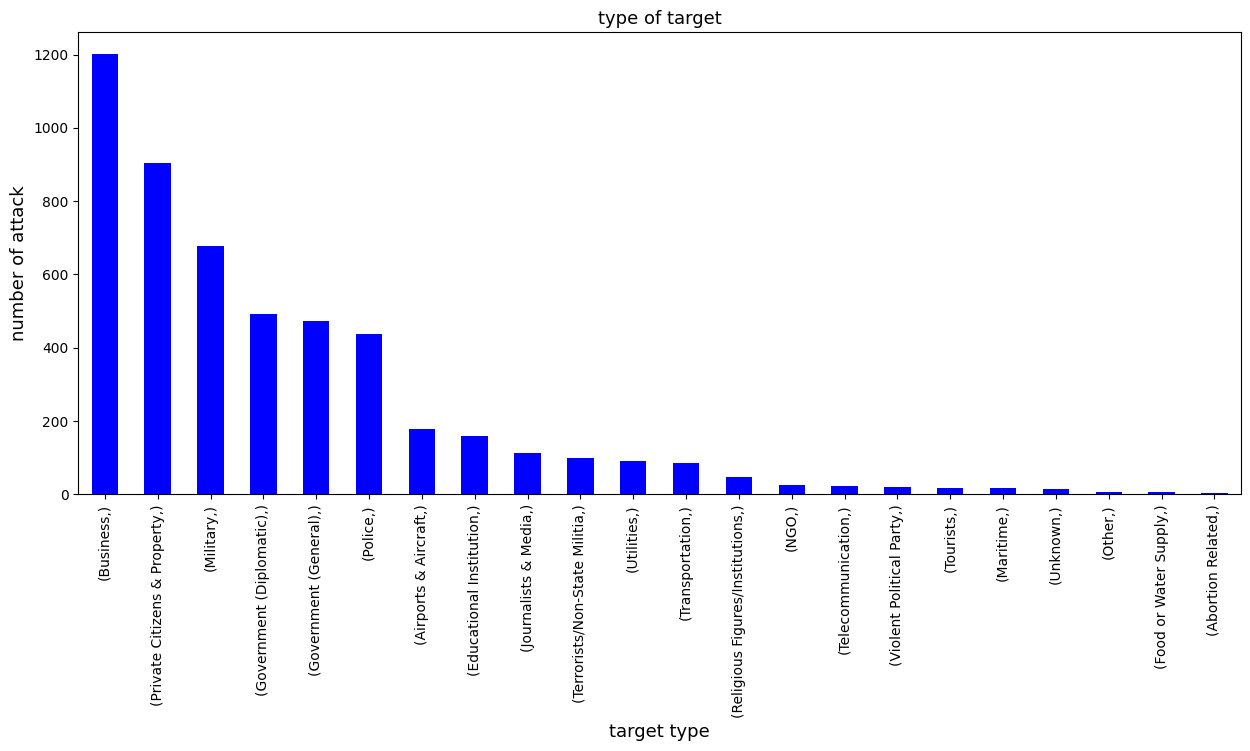

In [99]:
tr.plot(kind = 'bar', figsize = (15,6), color='blue')
plt.title('type of target', fontsize = 13)
plt.xlabel('target type', fontsize= 13)
plt.ylabel('number of attack', fontsize =13)
plt.show()


In [91]:
# group + country wise

gca = df[['group_name', 'country']].value_counts().drop('Unknown')
gca

<ipython-input-91-05dfb0372190>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca = df[['group_name', 'country']].value_counts().drop('Unknown')


group_name                                           country           
Irish Republican Army (IRA)                          United Kingdom        656
Protestant extremists                                United Kingdom        182
Left-Wing Militants                                  United States         169
Ulster Volunteer Force (UVF)                         United Kingdom        154
Basque Fatherland and Freedom (ETA)                  Spain                  99
                                                                          ... 
Military Council for the True Liberation of Albania  France                  1
Masada, Action and Defense Movement                  France                  1
Mahir Cayan Suicide Group                            Turkey                  1
MANO-D                                               Dominican Republic      1
Zero Point                                           Venezuela               1
Length: 489, dtype: int64